In [51]:
#ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.tree import DecisionTreeClassifier

In [52]:
import pandas as pd

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
data = pd.read_csv('./model_training_data.csv')
data.drop(columns=['Unnamed: 0', 'index'], inplace = True)

In [55]:
#input features
X = data.drop('label', axis = 1)

In [56]:
y = data['label']

In [57]:
X,y

(       landmark_1_x  landmark_1_y  landmark_1_z  landmark_2_x  landmark_2_y  \
 0          0.507577      0.690504     -0.067539      0.496229      0.623151   
 1          0.506913      0.685366     -0.056324      0.531459      0.619465   
 2          0.529042      0.675124     -0.048689      0.521464      0.605306   
 3          0.599993      0.747104     -0.070677      0.613960      0.620251   
 4          0.493806      0.719292     -0.075153      0.504832      0.598530   
 ...             ...           ...           ...           ...           ...   
 29007      0.513990      0.770279     -0.061498      0.512767      0.652325   
 29008      0.524270      0.708551     -0.071542      0.509271      0.603736   
 29009      0.524270      0.708551     -0.071542      0.509271      0.603736   
 29010      0.524270      0.708551     -0.071542      0.509271      0.603736   
 29011      0.524270      0.708551     -0.071542      0.509271      0.603736   
 
        landmark_2_z  landmark_3_x  la

In [58]:
#splits the data set into a traing and test set wherein the test set is 40% of the data set. random
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [59]:
#create a decision tree model
tree_clf = DecisionTreeClassifier(max_depth = 10,random_state=42, criterion ="entropy")

In [60]:
#decision tree training
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [61]:
#creates a visualization of the decision tree
feature_names = X.columns
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file="FER.dot",
    feature_names = feature_names,
    class_names=['angry','happy', 'sad', 'neutral'],
    rounded = True,
    filled=True,
    special_characters=True
)

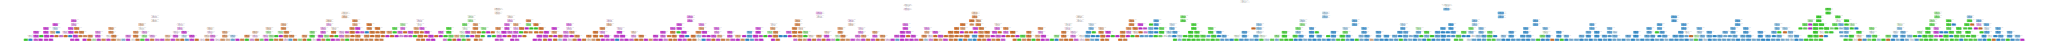

In [62]:
#displays the decision tree model visualization
from graphviz import Source
graph = Source.from_file("FER.dot")
graph.render("FER")
graph

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [64]:

cross_val_score(tree_clf,X_train,y_train, cv=5, scoring="accuracy")

array([0.79437105, 0.79724296, 0.77334099, 0.79689744, 0.78942833])

In [65]:
y_emotion_predict = cross_val_predict(tree_clf, X_train, y_train, cv=3)

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
cm = confusion_matrix(y_train,y_emotion_predict)
cm

array([[2947,   61,  430,  891],
       [ 115, 3949,  212,  106],
       [ 272,  196, 3642,  268],
       [ 848,  100,  374, 2996]])

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [69]:
#accuracy score
acs = accuracy_score(y_train,y_emotion_predict)

#precision score
#precision should be very high to avoid false positives
ps =precision_score(y_train,y_emotion_predict, average = "macro")
#recall score
rs = recall_score(y_train, y_emotion_predict, pos_label='e',average='macro')
#f1 score
fs =f1_score(y_train, y_emotion_predict, pos_label='e', average='macro')

print("Accuracy Score: ", acs)
print("Precision Score: ", ps)
print("Recall Score: ", rs)
print("F1 Score: ", fs)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'e') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'e') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy Score:  0.7775033032687999
Precision Score:  0.7766952876011913
Recall Score:  0.776917700097268
F1 Score:  0.7765360375442684


In [70]:
#Test set
test_pred = tree_clf.predict(X_test)
cm = confusion_matrix(y_test,test_pred)
cm

array([[1845,   32,  279,  768],
       [  49, 2571,  175,   76],
       [ 120,   72, 2451,  232],
       [ 212,   54,  287, 2382]])

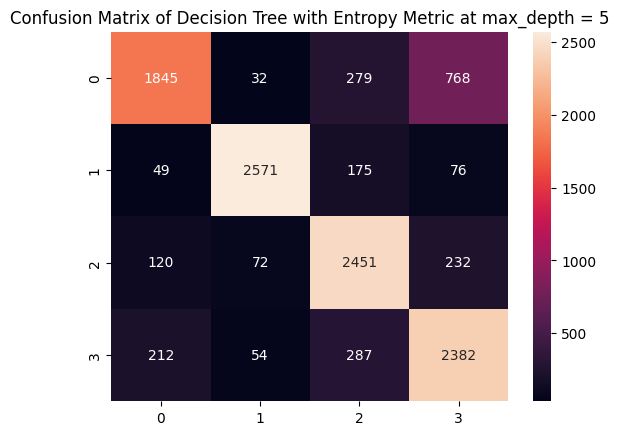

In [71]:
import seaborn as sb
import matplotlib.pyplot as plt

cmg = sb.heatmap(cm, annot=True, fmt='g')
plt.title("Confusion Matrix of Decision Tree with Entropy Metric at max_depth = 5")
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [72]:
acs_test = accuracy_score(y_test,test_pred)
ps_test = precision_score(y_test,test_pred, average = "macro")
rs_test = recall_score(y_test,test_pred, pos_label='e', average = "macro")
fs_test = f1_score(y_test,test_pred, pos_label='e', average = "macro")

print("Accuracy Score: ", acs_test)
print("Precision Score: ", ps_test)
print("Recall Score: ", rs_test)
print("F1 Score: ", fs_test)

Accuracy Score:  0.796984058595433
Precision Score:  0.806909731518373
Recall Score:  0.7976494525990542
F1 Score:  0.7969716938378565


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'e') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'e') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# Graphical Method for finding the best value of max_depth

Done:  5
Done:  6
Done:  7
Done:  8
Done:  9
Done:  10
Done:  11
Done:  12
Done:  13
Done:  14
Done:  15
Done:  16
Done:  17
Done:  18
Done:  19
Done:  20
Done:  21
Done:  22
Done:  23
Done:  24
Done:  25


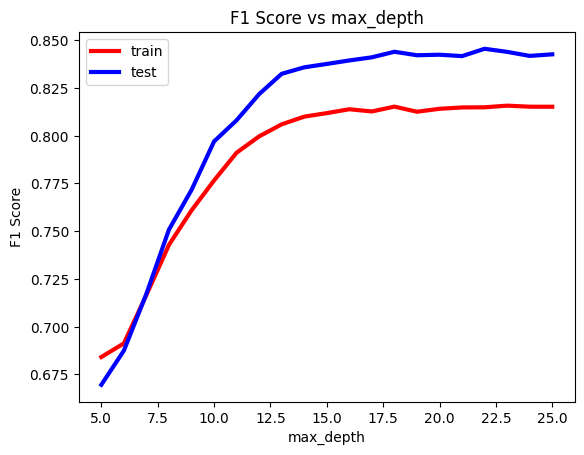

<Figure size 640x480 with 0 Axes>

In [74]:
max_depth = range(5, 26)
f1_test = []
f1_train = []

for i in max_depth:
    tree_clf = DecisionTreeClassifier(max_depth = i,random_state=42, criterion ="entropy")
    tree_clf.fit(X_train,y_train)
    y_emotion_predict = cross_val_predict(tree_clf, X_train, y_train, cv=3)
    f1_train.append(f1_score(y_train, y_emotion_predict,  average='macro'))
    test_pred = tree_clf.predict(X_test)
    f1_test.append(f1_score(y_test,test_pred, average = "macro"))
    print('Done: ', i)

plt.plot(max_depth, f1_train, "r-", linewidth=3, label="train")

plt.plot(max_depth, f1_test, "b-", linewidth=3, label="test")

plt.xlabel("max_depth")

plt.ylabel("F1 Score")

plt.legend(loc="best")

plt.title("F1 Score vs max_depth")

#display both the training and test set F1 scores

plt.show()

#save figure

plt.savefig('F1_Score_vs_max_depth.png', dpi=300, bbox_inches='tight')



In [75]:
#get the depth of the tree with the highest F1 score using index

best_depth = max_depth[f1_test.index(max(f1_test))]
best_depth

22

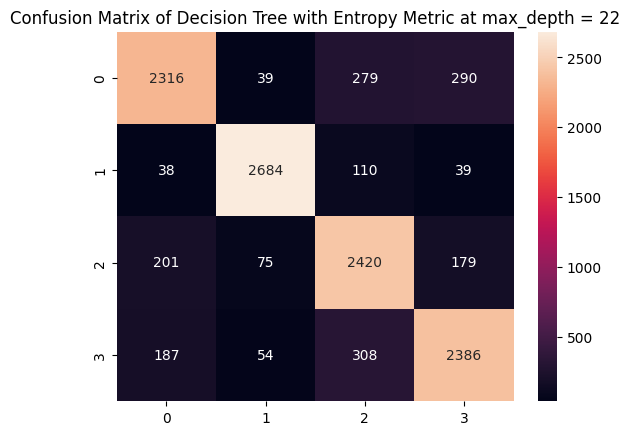

In [76]:
#rerun the model with the best depth

tree_clf = DecisionTreeClassifier(max_depth = best_depth,random_state=42, criterion ="entropy")

tree_clf.fit(X_train,y_train)

test_pred = tree_clf.predict(X_test)

cm = confusion_matrix(y_test,test_pred)

cmg = sb.heatmap(cm, annot=True, fmt='g')

plt.title("Confusion Matrix of Decision Tree with Entropy Metric at max_depth = " + str(best_depth))

plt.savefig('heatmap_best_depth.png', dpi=300, bbox_inches='tight')

In [77]:
export_graphviz(
    tree_clf,
    out_file="FER.dot",
    feature_names = feature_names,
    class_names=['angry','happy', 'sad', 'neutral'],
    rounded = True,
    filled=True,
    special_characters=True
)

graph = Source.from_file("FER.dot")
graph.render("FER_best_depth")
graph